In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy.spatial import cKDTree

In [2]:
csv = '../AnalysisReadyDataFrames/stat_df.csv'
df = pd.DataFrame(pd.read_csv(csv))

In [3]:
df.head()

,Borough,Area,Address,Num_Beds,Num_Baths,Sq-Ft,Rent,Long,Lat,ZipCode,Precinct,CrimeTotalPastYear
0,staten-island,New Dorp Beach,48C Winham Avenue,0.5,1.0,513.32,1199.0,-74.103650,40.565749,10306.0,120.0,799.0
1,staten-island,Eltingville,3676 Richmond Avenue,3.0,1.0,1500.00,2400.0,-74.167172,40.548162,10312.0,123.0,338.0
2,staten-island,Saint George,36 Hamilton Avenue,2.0,1.0,900.00,2150.0,-74.078906,40.644986,10301.0,120.0,799.0
3,staten-island,Saint George,36 Hamilton Avenue,1.0,1.0,750.00,1600.0,-74.078906,40.644986,10301.0,120.0,799.0
4,staten-island,Saint George,60 Hamilton Avenue,2.0,1.0,833.22,1950.0,-74.079733,40.644802,10301.0,120.0,799.0


In [4]:
# write lines aggregate to file for later use
with open('sublines_agg.json', 'r') as fp:
    lines_data = json.load(fp)

In [5]:
train_lines_ckd = {}

In [6]:
def create_lines_ckd(ckd_map:dict, lines_data:dict):
    for line in lines_data.keys():
        if line not in ckd_map:
            ckd_map[line] = None
        
        ckd_map[line] = cKDTree(lines_data[line])


In [7]:
create_lines_ckd(train_lines_ckd, lines_data)

In [8]:
train_lines_ckd.keys()

dict_keys(['G', 'Q', 'M', 'S', 'A', 'B-D', 'B-D-F-M', 'R', 'N-Q-R', 'N-Q', 'N-R', 'F', 'F-M', 'E', '7', 'J-Z', 'L', 'A-C', 'D', '1-2-3', 'B', '4-5-6', 'N', '1', 'N-W', '2-3', '2', '4-5', '5', '4', '3', 'A-C-E', 'N-Q-R-W', 'N-R-W', '6', 'R-W'])

In [9]:
def grid_search_line(lon, lat):
    nearests = []
    for line in train_lines_ckd:
        dist, _ = train_lines_ckd[line].query([lon, lat], k=1)
        nearests.append([dist, line])
    
    nearests.sort(key= lambda x: x[0])

    return nearests[0][1]

In [10]:
df['Train_Line'] = None

In [11]:
for idx, row in df.iterrows():
    lon, lat = row['Long'], row['Lat'],
    line_nearest = grid_search_line(lon, lat)
    df.at[idx, 'Train_Line'] = line_nearest

In [12]:
df

,Borough,Area,Address,Num_Beds,Num_Baths,Sq-Ft,Rent,Long,Lat,ZipCode,Precinct,CrimeTotalPastYear,Train_Line
0,staten-island,New Dorp Beach,48C Winham Avenue,0.5,1.0,513.32,1199.0,-74.103650,40.565749,10306.0,120.0,799.0,R
1,staten-island,Eltingville,3676 Richmond Avenue,3.0,1.0,1500.00,2400.0,-74.167172,40.548162,10312.0,123.0,338.0,R
2,staten-island,Saint George,36 Hamilton Avenue,2.0,1.0,900.00,2150.0,-74.078906,40.644986,10301.0,120.0,799.0,R
3,staten-island,Saint George,36 Hamilton Avenue,1.0,1.0,750.00,1600.0,-74.078906,40.644986,10301.0,120.0,799.0,R
4,staten-island,Saint George,60 Hamilton Avenue,2.0,1.0,833.22,1950.0,-74.079733,40.644802,10301.0,120.0,799.0,R
5,staten-island,Saint George,60 Hamilton Avenue,1.0,1.0,619.98,1450.0,-74.079733,40.644802,10301.0,120.0,799.0,R
6,staten-island,Midland Beach,51 Boundary Avenue,1.0,1.0,615.07,1300.0,-74.097555,40.580915,10306.0,120.0,799.0,R
7,staten-island,Tottenville,203 Main Street,1.0,1.0,700.00,1700.0,-74.247824,40.510184,10307.0,123.0,338.0,R
8,staten-island,Richmondtown,19E Franklin Lane,1.0,1.0,624.88,1600.0,-74.150414,40.569905,10306.0,123.0,338.0,R
9,staten-island,Saint George,133 Winter Avenue,3.0,1.0,1057.92,2800.0,-74.085860,40.638767,10301.0,120.0,799.0,R


In [13]:
df.to_csv(csv, index=False)

In [14]:
df.columns

Index(['Borough', 'Area', 'Address', 'Num_Beds', 'Num_Baths', 'Sq-Ft', 'Rent',
       'Long', 'Lat', 'ZipCode', 'Precinct', 'CrimeTotalPastYear',
       'Train_Line'],
      dtype='object')

In [15]:
# Bed, Bath, Sq-Ft, Rent, Correlation

df1 = df[['Num_Beds', 'Num_Baths', 'Sq-Ft', 'Rent']]

<AxesSubplot:>

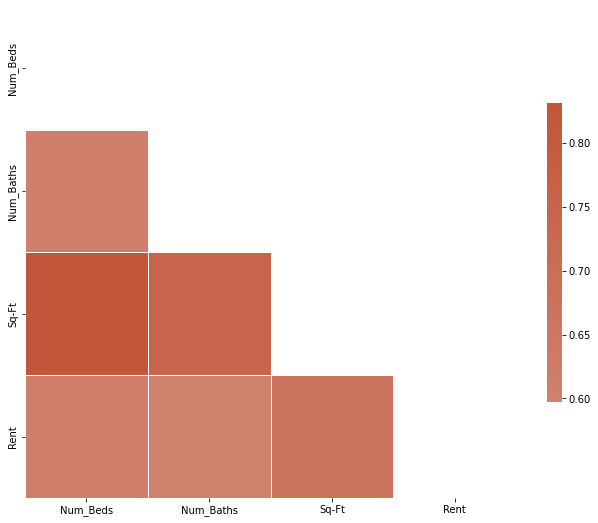

In [16]:
corr_mat1 = df1.corr(method='pearson')
mask = np.triu(np.ones_like(corr_mat1, dtype=bool))

f, ax = plt.subplots(figsize=(11, 11))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_mat1, mask=mask, cmap=cmap, robust=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

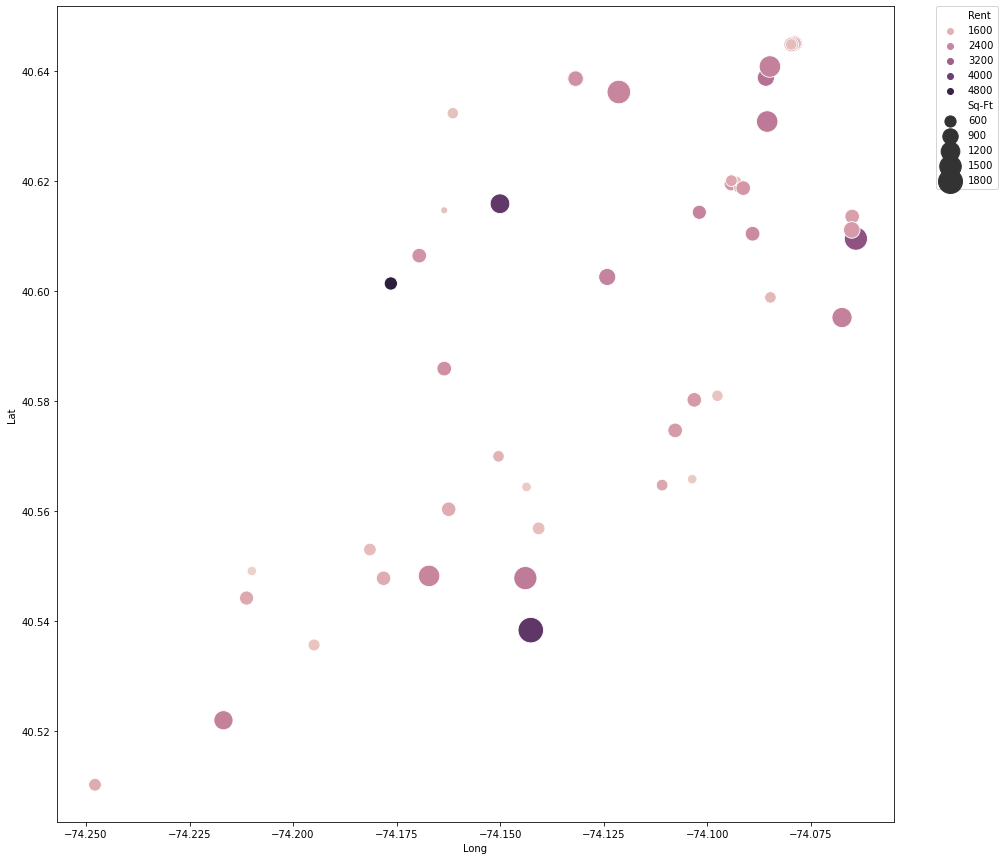

In [17]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x='Long', y='Lat', hue='Rent', size='Sq-Ft', sizes=(50, 650))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

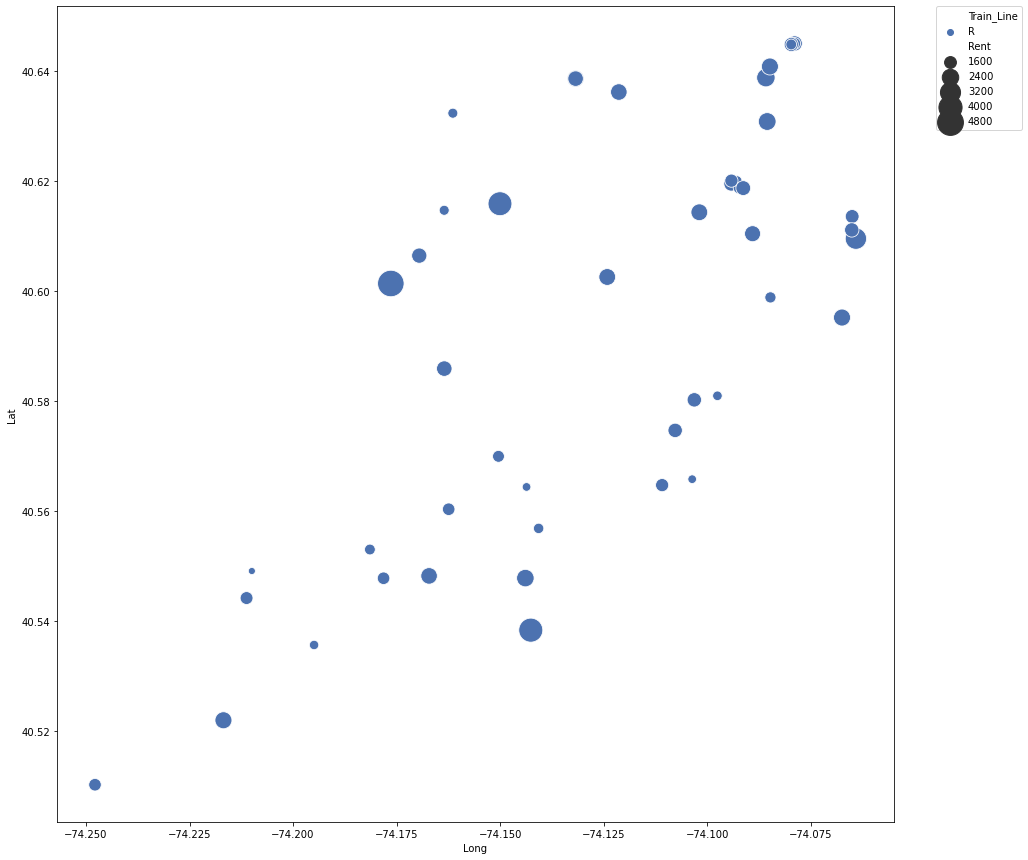

In [18]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x='Long', y='Lat', hue='Train_Line', size='Rent', sizes=(50, 700), palette=sns.color_palette('deep', df['Train_Line'].unique().shape[0]))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


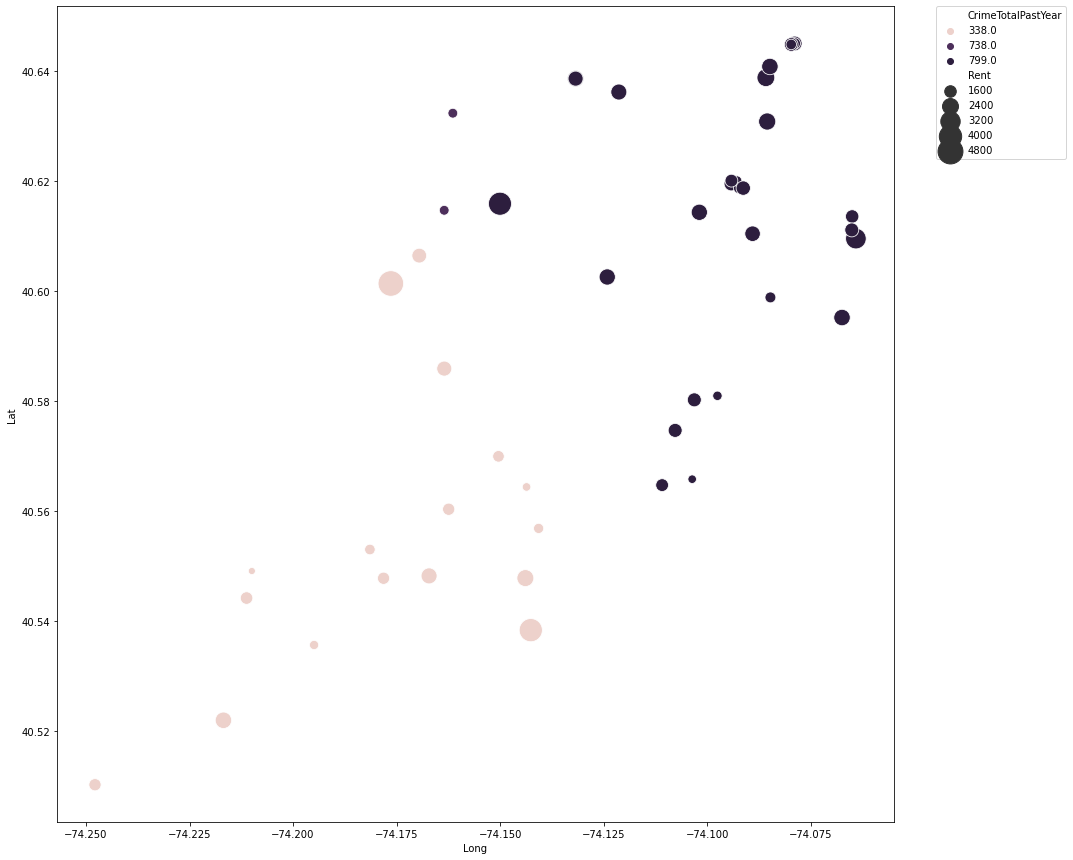

In [19]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x='Long', y='Lat', hue='CrimeTotalPastYear', size='Rent', sizes=(50, 650))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


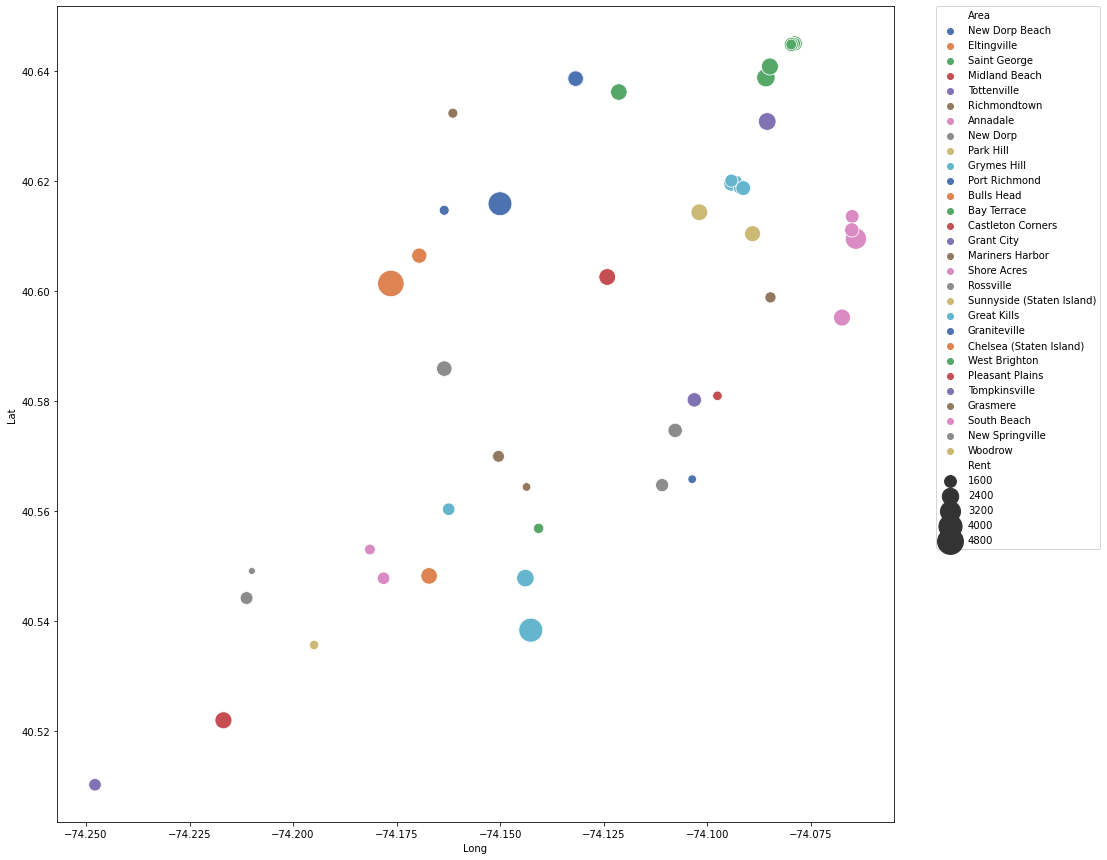

In [20]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x='Long', y='Lat', hue='Area', size='Rent', sizes=(50, 700), palette=sns.color_palette('deep', df['Area'].unique().shape[0]))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [21]:
# correlation between crime and rent

df3 = df[['Sq-Ft', 'Num_Beds', 'Num_Baths', 'CrimeTotalPastYear', 'Rent']]

<AxesSubplot:>

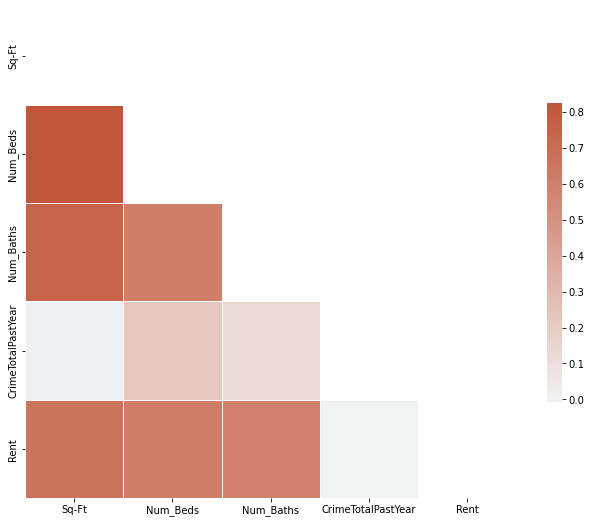

In [22]:
corr_mat3 = df3.corr(method='pearson')
mask = np.triu(np.ones_like(corr_mat3, dtype=bool))

f, ax = plt.subplots(figsize=(11, 11))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_mat3, mask=mask, cmap=cmap, robust=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

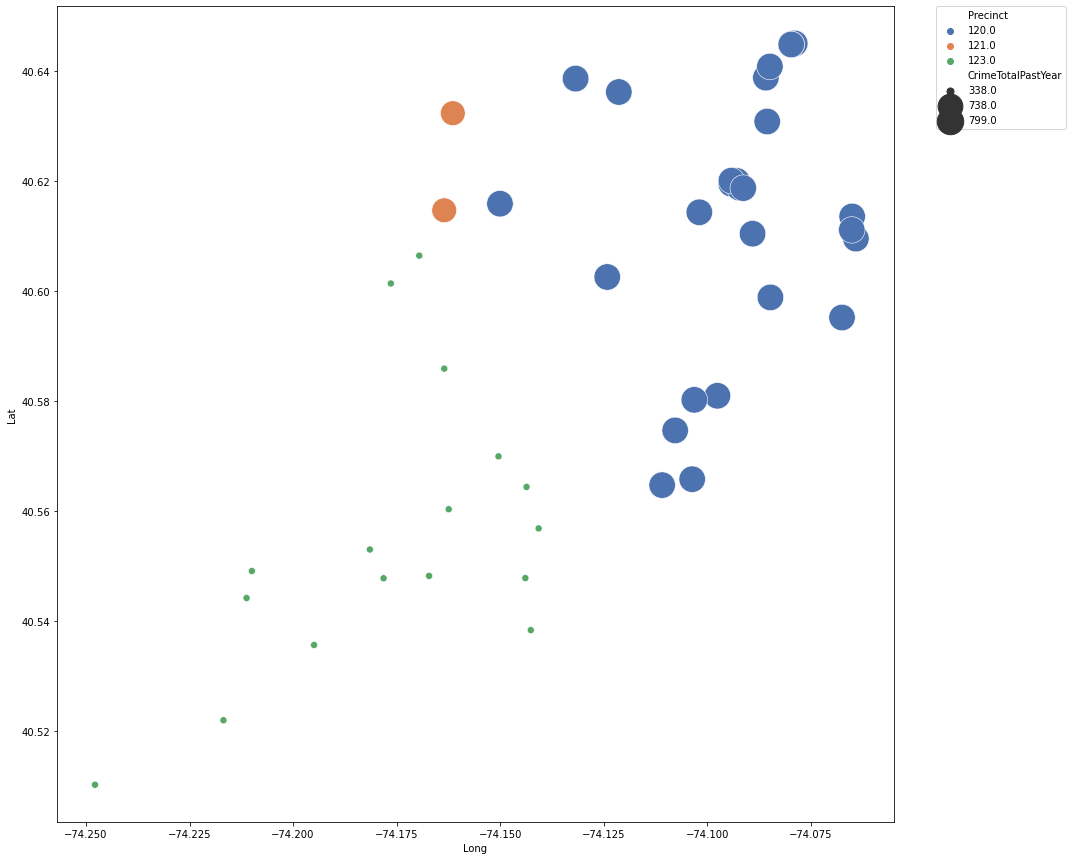

In [23]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x='Long', y='Lat', hue='Precinct', size='CrimeTotalPastYear', sizes=(50, 700), palette=sns.color_palette('deep', df['Precinct'].unique().shape[0]))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
